In [1]:
%matplotlib inline

In [2]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append("../..")
sys.path.append("../")
sys.path.append("./")

In [5]:
from src.data_pipeline.DataLoader import DataLoader
from src.utility.sys_utils import get_spark

# import result checking tools
from src.utility.Summary import Summary

In [6]:
spark = get_spark(cores=4) # change cores up to 6 if needed
dataloader = DataLoader(dataset_name="user_10_item_1_exp", config_name="default_config.json")

### Visualization of Evaluation Metric to Recommendation Size

In [7]:
summary = Summary(dataloader.get_config().db_path)
summary

In [8]:
hyper = summary.get_optimal_params("user_10_item_1_exp", "surprise_SVD", "ndcg@1")

result = summary.get_result_for_params("user_10_item_1_exp", "surprise_SVD", hyper, "ndcg@1")
result

Best ndcg@1 of surprise_SVD is found as 0.02730583581647411
For model surprise_SVD, it has a ndcg@1 of 0.02730583581647411


,model,hyper,metric,value,ts
0,surprise_SVD,"[('lr_all', 0.002), ('n_factors', 10), ('reg_a...",ndcg@1,0.027306,2019-12-18 01:58:00.216802


### Read ndcg top k info from parsed csv

In [9]:
parsed = pd.read_csv("../parse_results/results/topk_results.csv", sep = ',')
parsed.head()

,Unnamed: 0,model,hyper,metric,value,ts,k
0,0,CollectiveMF_Item,"[('k', 16), ('reg_param', 0.01), ('w_main', 0.5)]",ndcg@1,0.055422,2019-12-18 01:32:20.734647,1
1,1,CollectiveMF_Item,"[('k', 16), ('reg_param', 0.01), ('w_main', 0.5)]",ndcg@2,0.078422,2019-12-18 01:32:38.024594,2
2,2,CollectiveMF_Item,"[('k', 16), ('reg_param', 0.01), ('w_main', 0.5)]",ndcg@3,0.092794,2019-12-18 01:32:55.187776,3
3,3,CollectiveMF_Item,"[('k', 16), ('reg_param', 0.01), ('w_main', 0.5)]",ndcg@4,0.103548,2019-12-18 01:33:12.001429,4
4,4,CollectiveMF_Item,"[('k', 16), ('reg_param', 0.01), ('w_main', 0.5)]",ndcg@5,0.112015,2019-12-18 01:33:29.350053,5


In [10]:
parsed['model'].unique()

array(['CollectiveMF_Item', 'CollectiveMF_User', 'CollectiveMF_Both',
       'CollectiveMF_No', 'surprise_SVD', 'surprise_Baseline',
       'PureRandom', 'FMItem', 'FMNone', 'BPR'], dtype=object)

In [11]:
parsed[parsed['model']=='BPR'].head()

,Unnamed: 0,model,hyper,metric,value,ts,k
90,90,BPR,"[('factors', 16), ('iteration', 100), ('learni...",ndcg@1,0.065233,2019-12-18 07:51:42.829660,1
91,91,BPR,"[('factors', 16), ('iteration', 100), ('learni...",ndcg@2,0.093214,2019-12-18 07:52:10.560294,2
92,92,BPR,"[('factors', 16), ('iteration', 100), ('learni...",ndcg@3,0.111106,2019-12-18 07:52:37.923441,3
93,93,BPR,"[('factors', 16), ('iteration', 100), ('learni...",ndcg@4,0.124194,2019-12-18 07:53:04.796126,4
94,94,BPR,"[('factors', 16), ('iteration', 100), ('learni...",ndcg@5,0.134559,2019-12-18 07:53:32.115372,5


In [12]:
modelname = parsed['model'].unique()
modelname

array(['CollectiveMF_Item', 'CollectiveMF_User', 'CollectiveMF_Both',
       'CollectiveMF_No', 'surprise_SVD', 'surprise_Baseline',
       'PureRandom', 'FMItem', 'FMNone', 'BPR'], dtype=object)

In [14]:
## plot ndcg@k for all models
def plot_topk_ndcg(dataframe):
    """
    Input: a tidy dataframe with topk for all models
    Output: a ndcg@k plot
    """
    ## add more if needed
    color = ['black','m','goldenrod', 'wheat', 'c',
            'brown', 'slateblue', 'skyblue', 'yellowgreen', 
             'tomato', 'darkorange', 'lavender'] 
    marker = ['P', '^' ,'o','H', 'v', 'D', 'X', 'p', 'x','*']
    
    ## get model names (number of line)
    dfs = dict(tuple(dataframe.groupby('model')))
    modelname = dataframe['model'].unique()
    
    ## size of template
    size = len(modelname)
    colorsize = len(color)
    markersize = len(marker)
    tempsize = min(colorsize, markersize)
    
    ## plotting
    fig, ax = plt.subplots(1,1, figsize = (10,6))
    
    t = 0 ## default template index
    for i in range(size):
        t = i
        if t > tempsize: ## reset 
            t = 0    
        ax.plot(dfs[modelname[i]]['k'], dfs[modelname[i]]['value'], 
            marker=marker[t], color=color[t], linewidth=2, label = modelname[i])
        t =+ 1
    ax.legend()
    ax.set_xlabel("k", fontsize = 18)
    ax.set_ylabel('ndcg@k', fontsize = 18)
    ax.xaxis.set_tick_params(labelsize = 15)
    ax.yaxis.set_tick_params(labelsize = 15)
    ax.legend(bbox_to_anchor=(0.5,1.15), loc="upper center", ncol=5)
    
    plt.tight_layout()
    plt.savefig('figs/ndcg@k.eps', format='eps')
    
    return ax


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


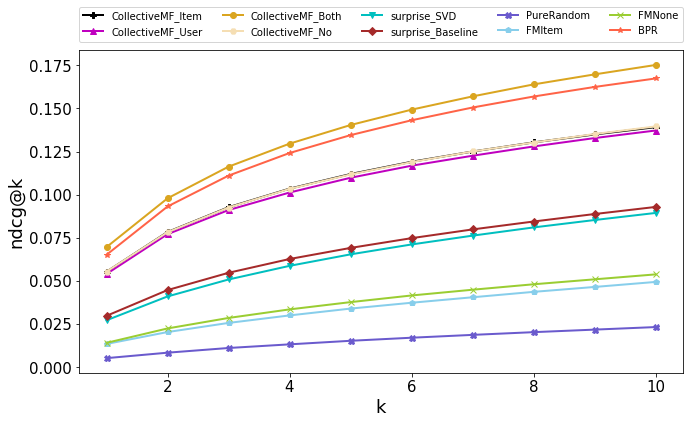

In [15]:
plot_topk_ndcg(parsed)